In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
df_gold = pd.read_csv('stock-data/GOLD.csv')
df_goog = pd.read_csv('stock-data/GOOG.csv')
df_aapl = pd.read_csv('stock-data/AAPL.csv')
df_msft = pd.read_csv('stock-data/MSFT.csv')
df_amzn = pd.read_csv('stock-data/AMZN.csv')
df = df_gold[['Date','Close']]
df.rename(columns={"Close":"GOLD"},inplace=True)
df['GOOG'] = df_goog['Close'].tolist()
df['AAPL'] = df_aapl['Close'].tolist()
df['MSFT'] = df_msft['Close'].tolist()
df['AMZN'] = df_amzn['Close'].tolist()
df = df.fillna(method='ffill')
df.head()

/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Date,GOLD,GOOG,AAPL,MSFT,AMZN
0,2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
1,2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2,2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
3,2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
4,2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000


In [6]:
df['amzn_returns'] = df['AMZN'].pct_change(1).mul(100)
df.head()

,Date,GOLD,GOOG,AAPL,MSFT,AMZN,amzn_returns
0,2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999,NaN
1,2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001,-0.868585
2,2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001,-0.452233
3,2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000,0.596249
4,2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000,-1.157211


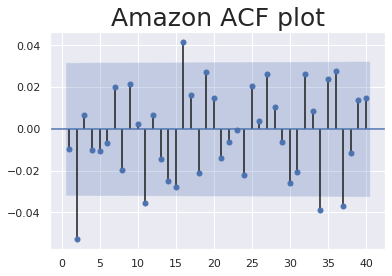

In [8]:
sgt.plot_acf(df['amzn_returns'].iloc[1:],lags=40,zero=False)
plt.title("Amazon ACF plot",size=25)
plt.show()

In [11]:
def LLR_test(model_1,model_2,DF=1): # DF = Degree of Freedom
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2 * (L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## MA(1) Returns

In [9]:
model_ret_ma_1 = ARMA(df.amzn_returns[1:],order=(0,1))
result_ret_ma_1 = model_ret_ma_1.fit()
result_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           amzn_returns   No. Observations:                 3776
Model:                     ARMA(0, 1)   Log Likelihood               -8730.920
Method:                       css-mle   S.D. of innovations              2.443
Date:                Sat, 27 Jun 2020   AIC                          17467.841
Time:                        12:13:52   BIC                          17486.550
Sample:                             0   HQIC                         17474.492
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1438      0.039      3.656      0.000       0.067       0.221
ma.L1.amzn_returns    -0.0106      0.017     -0.619      0.536      -0.044       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           93.9018           +0.0000j           93.9018            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
model_ret_ma_2 = ARMA(df.amzn_returns[1:],order=(0,2))
result_ret_ma_2 = model_ret_ma_2.fit()
result_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           amzn_returns   No. Observations:                 3776
Model:                     ARMA(0, 2)   Log Likelihood               -8725.495
Method:                       css-mle   S.D. of innovations              2.440
Date:                Sat, 27 Jun 2020   AIC                          17458.989
Time:                        12:15:00   BIC                          17483.935
Sample:                             0   HQIC                         17467.858
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1438      0.037      3.869      0.000       0.071       0.217
ma.L1.amzn_returns    -0.0095      0.016     -0.581      0.561      -0.041       0.022
ma.L2.amzn_returns    -0.0543      0.016     -3.300      0.001      -0.086      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.2070           +0.0000j            4.2070            0.0000
MA.2           -4.3812           +0.0000j            4.3812            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model_ret_ma_1 = ARMA(df.amzn_returns[1:],order=(0,1))
model_ret_ma_2 = ARMA(df.amzn_returns[1:],order=(0,2))
print ("LLR  test p-value {}".format(LLR_test(model_ret_ma_1,model_ret_ma_2)))

LLR  test p-value 0.001


In [14]:
model_ret_ma_3 = ARMA(df.amzn_returns[1:],order=(0,3))
result_ret_ma_3 = model_ret_ma_3.fit()
result_ret_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           amzn_returns   No. Observations:                 3776
Model:                     ARMA(0, 3)   Log Likelihood               -8725.438
Method:                       css-mle   S.D. of innovations              2.440
Date:                Sat, 27 Jun 2020   AIC                          17460.876
Time:                        12:20:57   BIC                          17492.058
Sample:                             0   HQIC                         17471.961
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1438      0.037      3.847      0.000       0.071       0.217
ma.L1.amzn_returns    -0.0096      0.016     -0.592      0.554      -0.042       0.022
ma.L2.amzn_returns    -0.0542      0.016     -3.297      0.001      -0.086      -0.022
ma.L3.amzn_returns     0.0055      0.016      0.337      0.736      -0.027       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.7207           -0.0000j            3.7207           -0.5000
MA.2            6.7574           -1.6981j            6.9675           -0.0392
MA.3            6.7574           +1.6981j            6.9675            0.0392
-----------------------------------------------------------------------------
"""

In [16]:
model_ret_ma_2 = ARMA(df.amzn_returns[1:],order=(0,2))
model_ret_ma_3 = ARMA(df.amzn_returns[1:],order=(0,3))
print ("LLR  test p-value {}".format(LLR_test(model_ret_ma_2,model_ret_ma_3)))

LLR  test p-value 0.736


In [17]:
model_ret_ma_4 = ARMA(df.amzn_returns[1:],order=(0,4))
result_ret_ma_4 = model_ret_ma_4.fit()
result_ret_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           amzn_returns   No. Observations:                 3776
Model:                     ARMA(0, 4)   Log Likelihood               -8725.182
Method:                       css-mle   S.D. of innovations              2.439
Date:                Sat, 27 Jun 2020   AIC                          17462.363
Time:                        12:21:58   BIC                          17499.782
Sample:                             0   HQIC                         17475.666
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1438      0.037      3.893      0.000       0.071       0.216
ma.L1.amzn_returns    -0.0099      0.016     -0.607      0.544      -0.042       0.022
ma.L2.amzn_returns    -0.0538      0.016     -3.307      0.001      -0.086      -0.022
ma.L3.amzn_returns     0.0062      0.016      0.376      0.707      -0.026       0.038
ma.L4.amzn_returns    -0.0119      0.017     -0.716      0.474      -0.044       0.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.6087           -0.0000j            2.6087           -0.5000
MA.2            2.7632           -0.0000j            2.7632           -0.0000
MA.3            0.1830           -3.4132j            3.4181           -0.2415
MA.4            0.1830           +3.4132j            3.4181            0.2415
-----------------------------------------------------------------------------
"""

In [18]:
model_ret_ma_3 = ARMA(df.amzn_returns[1:],order=(0,3))
model_ret_ma_4 = ARMA(df.amzn_returns[1:],order=(0,4))
print ("LLR  test p-value {}".format(LLR_test(model_ret_ma_3,model_ret_ma_4)))

LLR  test p-value 0.474


In [20]:
df['res_ret_ma_2'] = result_ret_ma_2.resid

In [21]:
round(df['res_ret_ma_2'].mean(),3)

-0.0

In [22]:
round(df['res_ret_ma_2'].var(),3)

5.953

In [23]:
round(df['res_ret_ma_2'].std(),3)

2.44

In [25]:
sts.adfuller(df['res_ret_ma_2'][2:])

(-61.43625686809555,
 0.0,
 0,
 3774,
 {'1%': -3.4320839039156588,
  '5%': -2.8623061432691532,
  '10%': -2.567177828379207},
 17283.870928216882)

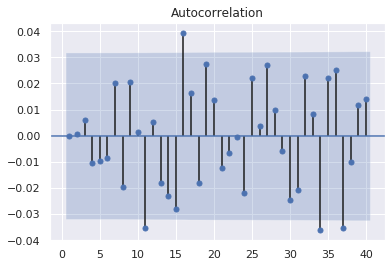

In [27]:
sgt.plot_acf(df['res_ret_ma_2'][1:],lags=40,zero=False)
plt.show()

## Normalized Returns

In [28]:
bench_ret = df.amzn_returns.iloc[1]
df['amzn_norm_ret'] = df['amzn_returns'].div(bench_ret).mul(100)
df.head()

,Date,GOLD,GOOG,AAPL,MSFT,AMZN,amzn_returns,res_ret_ma_2,amzn_norm_ret
0,2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999,NaN,NaN,NaN
1,2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001,-0.868585,-1.012401,100.000000
2,2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001,-0.452233,-0.605074,52.065469
3,2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000,0.596249,0.391986,-68.646043
4,2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000,-1.157211,-1.330054,133.229485


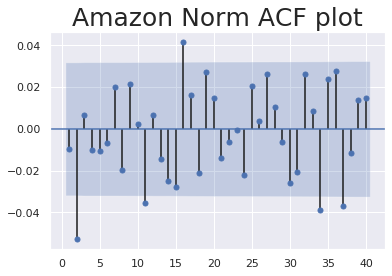

In [30]:
sgt.plot_acf(df['amzn_norm_ret'].iloc[1:],lags=40,zero=False)
plt.title("Amazon Norm ACF plot",size=25)
plt.show()

In [31]:
model_ret_ma_2_norm = ARMA(df.amzn_norm_ret[1:],order=(0,2))
result_ret_ma_2_norm = model_ret_ma_2_norm.fit()
result_ret_ma_2_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          amzn_norm_ret   No. Observations:                 3776
Model:                     ARMA(0, 2)   Log Likelihood              -26646.617
Method:                       css-mle   S.D. of innovations            280.872
Date:                Sat, 27 Jun 2020   AIC                          53301.234
Time:                        13:12:05   BIC                          53326.180
Sample:                             0   HQIC                         53310.103
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -16.5565      4.280     -3.869      0.000     -24.945      -8.168
ma.L1.amzn_norm_ret    -0.0095      0.016     -0.581      0.561      -0.041       0.022
ma.L2.amzn_norm_ret    -0.0543      0.016     -3.300      0.001      -0.086      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.2070           +0.0000j            4.2070            0.0000
MA.2           -4.3812           +0.0000j            4.3812            0.5000
-----------------------------------------------------------------------------
"""

## MA Models for Prices

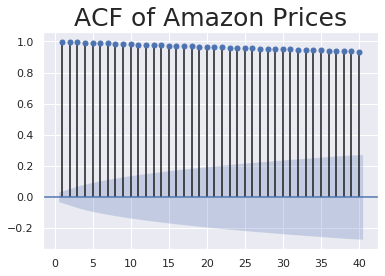

In [32]:
sgt.plot_acf(df.AMZN,lags=40,zero=False)
plt.title("ACF of Amazon Prices",size=25)
plt.show()

In [34]:
model_ma_1 = ARMA(df.AMZN,order=(0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   AMZN   No. Observations:                 3777
Model:                     ARMA(0, 1)   Log Likelihood              -27109.981
Method:                       css-mle   S.D. of innovations            316.792
Date:                Sat, 27 Jun 2020   AIC                          54225.962
Time:                        13:15:30   BIC                          54244.672
Sample:                             0   HQIC                         54232.614
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        536.5479     10.230     52.447      0.000     516.497     556.599
ma.L1.AMZN     0.9849      0.002    466.112      0.000       0.981       0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0153           +0.0000j            1.0153            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
model_ma_2 = ARMA(df.AMZN,order=(0,2))
result_ma_2 = model_ma_2.fit()
result_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   AMZN   No. Observations:                 3777
Model:                     ARMA(0, 2)   Log Likelihood              -24989.368
Method:                       css-mle   S.D. of innovations            180.649
Date:                Sat, 27 Jun 2020   AIC                          49986.735
Time:                        13:16:06   BIC                          50011.682
Sample:                             0   HQIC                         49995.604
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        536.7801     10.765     49.862      0.000     515.680     557.880
ma.L1.AMZN     1.7863      0.008    215.529      0.000       1.770       1.803
ma.L2.AMZN     0.8771      0.006    155.437      0.000       0.866       0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0183           -0.3213j            1.0678           -0.4514
MA.2           -1.0183           +0.3213j            1.0678            0.4514
-----------------------------------------------------------------------------
"""

In [36]:
model_ma_3 = ARMA(df.AMZN,order=(0,3))
result_ma_3 = model_ma_3.fit()
result_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   AMZN   No. Observations:                 3777
Model:                     ARMA(0, 3)   Log Likelihood              -23132.505
Method:                       css-mle   S.D. of innovations            110.458
Date:                Sat, 27 Jun 2020   AIC                          46275.009
Time:                        13:16:28   BIC                          46306.192
Sample:                             0   HQIC                         46286.095
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.0401     11.168     48.089      0.000     515.152     558.928
ma.L1.AMZN     2.2259      0.010    231.544      0.000       2.207       2.245
ma.L2.AMZN     2.1309      0.011    189.143      0.000       2.109       2.153
ma.L3.AMZN     0.8592      0.006    132.963      0.000       0.846       0.872
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.7007           -0.7668j            1.0387           -0.3678
MA.2           -0.7007           +0.7668j            1.0387            0.3678
MA.3           -1.0787           -0.0000j            1.0787           -0.5000
-----------------------------------------------------------------------------
"""